# PATHWAY ABUNDANCE (fr now this time please)

## step 1: get all the packages in

In [75]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import wesanderson
import re

## step 2: load all necessary data

In [76]:
# bowtie hit summaries for propionate
compiled_bt_hit_summaries_allpathways = pd.read_csv("compiled_bt_hit_summaries_allpathways.csv")

# gene lengths 
allpathways_gene_catalogue_seqlengths = pd.read_csv("allpathways_gene_catalogue_seqlengths.csv").set_index("gene")

# gene information
allpathways_gene_info = pd.read_csv("allpathways_genesInCatalogue_long.csv")
allpathways_gene_info = allpathways_gene_info.drop(allpathways_gene_info.columns[0], axis=1).set_index("strain_gene")

## gene length correction (new, using formula proposed by RC, step 1 of it)

### the function for gene length correctin
note, this only does $hits\;of\;gene \cdot length(gene)$. The full formula is given as follows: $$

In [77]:
def gene_length_correction_new(gene_catalogue_seqlengths, compiled_bt_hit_summaries):

    gene_length_df = gene_catalogue_seqlengths

    df = compiled_bt_hit_summaries.drop(["pathway"], axis=1).set_index("read_accession")

    new = df.copy()

    # first replace the values in new with the gene length of that gene
    for gene in compiled_bt_hit_summaries:
        
        if gene in gene_length_df.index:
        
            gene_length = gene_length_df.loc[gene].at["length"]

            new[gene] = [gene_length] * len(new)

    # equivalent to hits of gene * length(gene)
    new = df.multiply(new)

    return new

### running the code for gene length correction

In [78]:
compiled_bt_hit_summaries_all_pathways_length_corrected = gene_length_correction_new(allpathways_gene_catalogue_seqlengths, compiled_bt_hit_summaries_allpathways)

compiled_bt_hit_summaries_all_pathways_length_corrected

Blautia-wexlerae-DSM-19850-MAF-2_Roseburia-inulivorans-pduCDE  \
read_accession                                                                  
ERR4330026                                               459772.0               
ERR4330027                                               104036.0               
ERR4330028                                                35238.0               
ERR4330029                                                20136.0               
ERR4330030                                                96485.0               
...                                                           ...               
SRR4052040                                                    NaN               
SRR4052041                                                    NaN               
SRR4052042                                                10907.0               
SRR4052043                                                  839.0               
SRR4052044                                                  839.0               

                Bacteroides-stercoris-ATCC-43183-MAF-2_rplB  \
read_accession                                                
ERR4330026                                         117232.0   
ERR4330027                                              NaN   
ERR4330028                                           3808.0   
ERR4330029                                           1088.0   
ERR4330030                                              NaN   
...                                                     ...   
SRR4052040                                              NaN   
SRR4052041                                              NaN   
SRR4052042                                              NaN   
SRR4052043                                           1088.0   
SRR4052044                                           1360.0   

                Bacteroides_vulgatus_rplB  \
read_accession                              
ERR4330026                        76976.0   
ERR4330027                         3808.0   
ERR4330028                         8432.0   
ERR4330029                        14960.0   
ERR4330030                         2448.0   
...                                   ...   
SRR4052040                            NaN   
SRR4052041                          272.0   
SRR4052042                          272.0   
SRR4052043                         5712.0   
SRR4052044                         9520.0   

                Blautia-wexlerae-DSM-19850-MAF-2_fucO  \
read_accession                                          
ERR4330026                                   102709.0   
ERR4330027                                    34110.0   
ERR4330028                                     5685.0   
ERR4330029                                    20845.0   
ERR4330030                                    20466.0   
...                                               ...   
SRR4052040                                        NaN   
SRR4052041                                        NaN   
SRR4052042                                    56850.0   
SRR4052043                                     1137.0   
SRR4052044                                        NaN   

                Acidaminococcus-intestini-D21-MAF-2_bcd  \
read_accession                                            
ERR4330026                                     132088.0   
ERR4330027                                          NaN   
ERR4330028                                      41712.0   
ERR4330029                                          NaN   
ERR4330030                                          NaN   
...                                                 ...   
SRR4052040                                          NaN   
SRR4052041                                          NaN   
SRR4052042                                          NaN   
SRR4052043                                      48664.0   
SRR4052044                                          NaN   

                Acidaminococcus-intestini-D21-

## useful setup for calculating pathway abundances

In [79]:
pathway_gene_lists = []
pathways = []
pathway_dict = {}
pathway_length_dict = {}

wrong_names_dict = {
    "P1_SP": "sodium-pumping decarboxylase",
    "P1_WWC": "Wood-Werkman Cycle",
    "P2": "acrylate pathway",
    "P3": "propanediol pathway"
}

# loop through the entire directory of gene lists
for file in os.listdir("geneLists"):

    file_n = "geneLists/" + str(file)

    # get the actual pathway from the filename
    pathway = str(file).replace("_gene_list.txt", "")

    if pathway in wrong_names_dict:
        pathway = wrong_names_dict[pathway]

    # get the list of genes in each file
    geneList = [line.rstrip() for line in open(file_n)]

    pathways.append(pathway)

    # this my way of bypassing that strange assign function from R
    pathway_dict[pathway] = geneList

    # pathway_length_dict[pathway + "_pathway_length"] = len(geneList)

    pathway_length_dict[pathway] = len(geneList)
    
    pathway_gene_lists.append(geneList)

# turn the gene pathways list of lists into a pandas dataframe, using `pathways` as the column names

gene_pathways_df = pd.DataFrame(pathway_gene_lists).transpose()

gene_pathways_df.columns = pathways

gene_pathways_df

acetylCoA_buk propanediol pathway  \
0            buk                fucO   
1            hbd                pduP   
2            ptb                pduC   
3            thl                pduD   
4            bcd                pduE   
5            cro                pduL   
6           None                pduW   
7           None                None   
8           None                None   
9           None                None   
10          None                None   

                     sodium-pumping decarboxylase aminobutyrate_buk  \
0             methylmalonyl-CoA-mutase-EC5-4-99-2               buk   
1          methylmalonyl-CoA-epimerase-EC5-1-99-1               ptb   
2   methylmalonyl-CoA-decarboxylaseGamma-KOK23351              abfD   
3   methylmalonyl-CoA-decarboxylaseDelta-KOK23352              abfH   
4    methylmalonyl-CoA-decarboxylaseBeta-KOK20509              abfT   
5   methylmalonyl-CoA-decarboxylaseAlpha-KOK01604               bcd   
6                                            None              None   
7                                            None              None   
8                                            None              None   
9                                            None              None   
10                                           None              None   

                                   Wood-Werkman Cycle lysine glutarate  \
0                 methylmalonyl-CoA-mutase-EC5-4-99-2    kal      hgdC   
1              methylmalonyl-CoA-epimerase-EC5-1-99-1   kamA      hgdB   
2   methylmalonyl-CoA-carboxyltransferase12S-KOK17489   kamD      hgdA   
3    methylmalonyl-CoA-carboxyltransferase5S-KOK03416   kamE      gctA   
4   methylmalonyl-CoA-carboxyltransferase1-3S-KOK1...    kce      gctB   
5                                                None    kdd      gcdB   
6                                                None   atoA      gcdA   
7                                                None   atoD       but   
8                                                None    bcd       buk   
9                                                None   None       ptb   
10                                               None   None       bcd   

   acrylate pathway acetylCoA_but aminobutyrate_but  
0              lcdA           but               but  
1              lcdB           hbd              abfD  
2              lcdC           thl              abfH  
3              acrC           bcd              abfT  
4               pct           cro               bcd  
5              None          None              None  
6              None          None              None  
7              None          None              None  
8              None          None              None  
9              None          None              None  
10             None          None              None

## calculating pathway abundances

### generate the dataframe to put everything in

## new approach: merge whatever RC has onto the final table

In [80]:
def add_genes_in_catalogue(hit_table, gene_info, gene_catalogue_seqlengths):

    temp = hit_table.transpose()

    temp = temp.merge(gene_info, how="left", left_index=True, right_index=True)

    strain = temp.pop("strain")
    temp.insert(0, strain.name, strain)

    pathway = temp.pop("pathway")
    temp.insert(1, pathway.name, pathway)

    gene = temp.pop("gene")
    temp.insert(2, gene.name, gene)

    strain_pathway = temp.pop("strain_pathway")
    temp.insert(3, strain_pathway.name, strain_pathway)

    temp = temp.merge(gene_catalogue_seqlengths, how="left", left_index=True, right_index=True)

    length = temp.pop("length")
    temp.insert(4, length.name, length)

    return temp

In [81]:
final_hit_table = add_genes_in_catalogue(compiled_bt_hit_summaries_all_pathways_length_corrected, allpathways_gene_info, allpathways_gene_catalogue_seqlengths)

final_hit_table

strain  \
Abiotrophia_defectiva_rplB                             Abiotrophia_defectiva   
Achromobacter_denitrificans_rplB                 Achromobacter_denitrificans   
Achromobacter_insuavis_rplB                           Achromobacter_insuavis   
Acidaminococcus-intestini-D21-MAF-2_bcd  Acidaminococcus-intestini-D21-MAF-2   
Acidaminococcus-intestini-D21-MAF-2_bcd  Acidaminococcus-intestini-D21-MAF-2   
...                                                                      ...   
Weissella_confusa_rplB                                     Weissella_confusa   
Weissella_viridescens_rplB                             Weissella_viridescens   
Yersinia_enterocolitica_rplB                         Yersinia_enterocolitica   
Yersinia_pseudotuberculosis_rplB                 Yersinia_pseudotuberculosis   
Yokenella_regensburgei_rplB                           Yokenella_regensburgei   

                                               pathway              gene  \
Abiotrophia_defectiva_rplB                housekeeping  description.rplB   
Achromobacter_denitrificans_rplB          housekeeping  description.rplB   
Achromobacter_insuavis_rplB               housekeeping  description.rplB   
Acidaminococcus-intestini-D21-MAF-2_bcd  acetylCoA_buk   description.bcd   
Acidaminococcus-intestini-D21-MAF-2_bcd  glutarate_buk   description.bcd   
...                                                ...               ...   
Weissella_confusa_rplB                    housekeeping  description.rplB   
Weissella_viridescens_rplB                housekeeping  description.rplB   
Yersinia_enterocolitica_rplB              housekeeping  description.rplB   
Yersinia_pseudotuberculosis_rplB          housekeeping  description.rplB   
Yokenella_regensburgei_rplB               housekeeping  description.rplB   

                                                         strain_pathway  \
Abiotrophia_defectiva_rplB                                 housekeeping   
Achromobacter_denitrificans_rplB                           housekeeping   
Achromobacter_insuavis_rplB                                housekeeping   
Acidaminococcus-intestini-D21-MAF-2_bcd  acetylCoA_buk or glutarate_buk   
Acidaminococcus-intestini-D21-MAF-2_bcd  acetylCoA_buk or glutarate_buk   
...                                                                 ...   
Weissella_confusa_rplB                                     housekeeping   
Weissella_viridescens_rplB                                 housekeeping   
Yersinia_enterocolitica_rplB                               housekeeping   
Yersinia_pseudotuberculosis_rplB                           housekeeping   
Yokenella_regensburgei_rplB                                housekeeping   

                                         length  ERR4330026  ERR4330027  \
Abiotrophia_defectiva_rplB                274.0         NaN         NaN   
Achromobacter_denitrificans_rplB          273.0         NaN         NaN   
Achromobacter_insuavis_rplB               273.0         NaN         NaN   
Acidaminococcus-intestini-D21-MAF-2_bcd   632.0    132088.0         NaN   
Acidaminococcus-intestini-D21-MAF-2_bcd   632.0    132088.0         NaN   
...                                         ...         ...         ...   
Weissella_confusa_rplB                    275.0         NaN         NaN   
Weissella_viridescens_rplB                275.0         NaN         NaN   
Yersinia_enterocolitica_rplB              272.0         NaN         NaN   
Yersinia_pseudotuberculosis_rplB          272.0         NaN         NaN   
Yokenella_regensburgei_rplB               271.0         NaN         NaN   

                                         ERR4330028  ERR4330029  ERR4330030  \
Abiotrophia_defectiva_rplB                      NaN         NaN         NaN   
Achromobacter_denitrificans_rplB                NaN         NaN         NaN   
Achromobacter_insuavis_rplB                     NaN         NaN         NaN   
Acidaminococcus-intestini-D21-MAF-2_bcd     41712.0         NaN         NaN   

## part 2 of length correction: dividing by number of hits for rplB

In [82]:
def length_correction_denominator(hit_table):

    # grouped = hit_table.groupby("overall_pathway").sum().drop(["strain", "pathway", "gene", "strain_pathway", "length"], axis=1)

    grouped = hit_table.groupby("strain_pathway").sum().drop(["strain", "pathway", "gene", "length"], axis=1)

    rplB_sum = grouped.loc["housekeeping"]

    not_samples = ["strain", "pathway", "gene", "strain_pathway", "length"]

    new = hit_table.copy

    for read in grouped:

        hit_table[read] /= rplB_sum[read]

    return hit_table


In [83]:
final_hit_table = length_correction_denominator(final_hit_table)

final_hit_table

strain  \
Abiotrophia_defectiva_rplB                             Abiotrophia_defectiva   
Achromobacter_denitrificans_rplB                 Achromobacter_denitrificans   
Achromobacter_insuavis_rplB                           Achromobacter_insuavis   
Acidaminococcus-intestini-D21-MAF-2_bcd  Acidaminococcus-intestini-D21-MAF-2   
Acidaminococcus-intestini-D21-MAF-2_bcd  Acidaminococcus-intestini-D21-MAF-2   
...                                                                      ...   
Weissella_confusa_rplB                                     Weissella_confusa   
Weissella_viridescens_rplB                             Weissella_viridescens   
Yersinia_enterocolitica_rplB                         Yersinia_enterocolitica   
Yersinia_pseudotuberculosis_rplB                 Yersinia_pseudotuberculosis   
Yokenella_regensburgei_rplB                           Yokenella_regensburgei   

                                               pathway              gene  \
Abiotrophia_defectiva_rplB                housekeeping  description.rplB   
Achromobacter_denitrificans_rplB          housekeeping  description.rplB   
Achromobacter_insuavis_rplB               housekeeping  description.rplB   
Acidaminococcus-intestini-D21-MAF-2_bcd  acetylCoA_buk   description.bcd   
Acidaminococcus-intestini-D21-MAF-2_bcd  glutarate_buk   description.bcd   
...                                                ...               ...   
Weissella_confusa_rplB                    housekeeping  description.rplB   
Weissella_viridescens_rplB                housekeeping  description.rplB   
Yersinia_enterocolitica_rplB              housekeeping  description.rplB   
Yersinia_pseudotuberculosis_rplB          housekeeping  description.rplB   
Yokenella_regensburgei_rplB               housekeeping  description.rplB   

                                                         strain_pathway  \
Abiotrophia_defectiva_rplB                                 housekeeping   
Achromobacter_denitrificans_rplB                           housekeeping   
Achromobacter_insuavis_rplB                                housekeeping   
Acidaminococcus-intestini-D21-MAF-2_bcd  acetylCoA_buk or glutarate_buk   
Acidaminococcus-intestini-D21-MAF-2_bcd  acetylCoA_buk or glutarate_buk   
...                                                                 ...   
Weissella_confusa_rplB                                     housekeeping   
Weissella_viridescens_rplB                                 housekeeping   
Yersinia_enterocolitica_rplB                               housekeeping   
Yersinia_pseudotuberculosis_rplB                           housekeeping   
Yokenella_regensburgei_rplB                                housekeeping   

                                         length  ERR4330026  ERR4330027  \
Abiotrophia_defectiva_rplB                274.0         NaN         NaN   
Achromobacter_denitrificans_rplB          273.0         NaN         NaN   
Achromobacter_insuavis_rplB               273.0         NaN         NaN   
Acidaminococcus-intestini-D21-MAF-2_bcd   632.0    0.281529         NaN   
Acidaminococcus-intestini-D21-MAF-2_bcd   632.0    0.281529         NaN   
...                                         ...         ...         ...   
Weissella_confusa_rplB                    275.0         NaN         NaN   
Weissella_viridescens_rplB                275.0         NaN         NaN   
Yersinia_enterocolitica_rplB              272.0         NaN         NaN   
Yersinia_pseudotuberculosis_rplB          272.0         NaN         NaN   
Yokenella_regensburgei_rplB               271.0         NaN         NaN   

                                         ERR4330028  ERR4330029  ERR4330030  \
Abiotrophia_defectiva_rplB                      NaN         NaN         NaN   
Achromobacter_denitrificans_rplB                NaN         NaN         NaN   
Achromobacter_insuavis_rplB                     NaN         NaN         NaN   
Acidaminococcus-intestini-D21-MAF-2_bcd    0.105385         NaN         NaN   

## this step is to normalise by proportion for the unknown samples

The formula for this normalisation is given as follows. Let $x$ be the amount of the mixed sample, $S_n$ be the known we are trying to approximate, and $S_i$ be the $i$-th known sample that is in the mixed sample. Let there be $n$ known samples in the mixed sample. As such, the total amount of $S_n$ can be given as follows:

$$actual\;amount\;of\;S_n = \frac{S_n}{\sum_{i=1}^{n} S_i} \cdot x$$

A function to perform this normalisation is given below.

In [85]:
def normalise_unknown(df):

    new = df.copy()

    unknown_samples = {
        "acetylCoA_buk or glutarate_buk": ["acetylCoA_buk", "glutarate_buk"],
        "aminobutyrate_but or acetylCoA_but": ["aminobutyrate_but", "acetylCoA_but"],
        "acetylCoA_buk or lysine": ["acetylCoA_buk", "lysine"],
        "acetylCoA_but or glutarate_but": ["acetylCoA_but", "glutarate_but"],
        "acetylCoA_but or glutarate_but or lysine": ["acetylCoA_but", "glutarate_but", "lysine"],
        "acetylCoA_but or lysine": ["acetylCoA_but", "lysine"],
        "aminobutyrate_buk or acetylCoA_buk": ["aminobutyrate_buk", "acetylCoA_buk"],
        "aminobutyrate_buk or acetylCoA_buk or lysine": ["aminobutyrate_buk", "acetylCoA_buk", "lysine"],
        "aminobutyrate_buk or lysine": ["aminobutyrate_buk", "lysine"],
        "aminobutyrate_but or acetylCoA_but": ["aminobutyrate_but", "acetylCoA_but"],
        "aminobutyrate_but or acetylCoA_but or glutarate_but": ["aminobutyrate_but", "acetylCoA_but", "glutarate_but"]
    }

    for sample in df:

        for pathway in list(df.index):

            if " or " in pathway:

                unknown_proportion = df.loc[pathway].at[sample]

                if unknown_proportion == 0: break

                components_list = unknown_samples[pathway]
                proportion_dict = {}
                denominator = 0
                
                for component in components_list:

                    if df.loc[component].at[sample] != 0:

                        proportion_dict[component] = df.loc[component].at[sample]
                        denominator += proportion_dict[component]

                if len(proportion_dict) > 1:

                    for component in components_list:

                        new.loc[component].at[sample] = proportion_dict[component] + ((proportion_dict[component] / denominator) * unknown_proportion)

    new = new.drop(list(unknown_samples.keys()))

    return new

Now, actually implement the `normalisation_unknown` function on actual data

First, perform some preprocessing of the data

In [86]:
overall_pathway_group = final_hit_table.groupby(["strain_pathway"]).sum()

overall_pathway_group = overall_pathway_group.drop(["strain", "pathway", "gene", "length"], axis=1).drop(["housekeeping"], axis=0)

overall_pathway_group

ERR4330026  ERR4330027  \
strain_pathway                                                               
Wood-Werkman Cycle                                    0.003478    0.003516   
acetylCoA_buk                                         0.380165    0.182759   
acetylCoA_buk or glutarate_buk                        0.932904    0.000000   
acetylCoA_buk or lysine                               0.000000    0.017624   
acetylCoA_but                                         0.859171    2.056273   
acetylCoA_but or glutarate_but                        0.000000    0.008872   
acetylCoA_but or glutarate_but or lysine              0.000000    0.000000   
acetylCoA_but or lysine                               0.000000    0.008886   
acrylate pathway                                      0.002479    0.029038   
aminobutyrate_buk                                     0.026902    0.035831   
aminobutyrate_buk or acetylCoA_buk                    0.007886    0.007040   
aminobutyrate_buk or acetylCoA_buk or lysine          0.097447    0.018624   
aminobutyrate_buk or lysine                           0.000000    0.006633   
aminobutyrate_but                                     0.007952    0.004202   
aminobutyrate_but or acetylCoA_but                    0.000000    0.000000   
aminobutyrate_but or acetylCoA_but or glutarate...    0.000000    0.000000   
glutarate_buk                                         0.662635    0.000000   
glutarate_but                                         0.004717    0.021767   
lysine                                                0.271120    0.276666   
propanediol pathway                                   1.508643    0.308419   
sodium-pumping decarboxylase                          0.000000    0.058329   

                                                    ERR4330028  ERR4330029  \
strain_pathway                                                               
Wood-Werkman Cycle                                    0.062410    0.062969   
acetylCoA_buk                                         0.487402    0.178006   
acetylCoA_buk or glutarate_buk                        0.343255    0.000000   
acetylCoA_buk or lysine                               0.017372    0.004022   
acetylCoA_but                                         2.454502    2.111748   
acetylCoA_but or glutarate_but                        0.001935    0.000000   
acetylCoA_but or glutarate_but or lysine              0.000000    0.000000   
acetylCoA_but or lysine                               0.000000    0.000000   
acrylate pathway                                      0.014608    0.020944   
aminobutyrate_buk                                     0.054360    0.047619   
aminobutyrate_buk or acetylCoA_buk                    0.004517    0.002425   
aminobutyrate_buk or acetylCoA_buk or lysine          0.066237    0.029694   
aminobutyrate_buk or lysine                           0.003820    0.010475   
aminobutyrate_but                                     0.008471    0.014103   
aminobutyrate_but or acetylCoA_but                    0.000000    0.000000   
aminobutyrate_but or acetylCoA_but or glutarate...    0.000000    0.000000   
glutarate_buk                                         0.300484    0.000000   
glutarate_but                                         0.000000    0.000000   
lysine                                                0.382355    0.324417   
propanediol pathway                                   0.176322    0.126641   
sodium-pumping decarboxylase                          0.032511    0.000644   

                                                    ERR4330030  ERR4330031  \
strain_pathway                                                               
Wood-Werkman Cycle                                    0.002673    0.000000   
acetylCoA_buk                                         0.460613    0.629350   
acetylCoA_buk or glutarate_buk                        0.000000    0.000000   
acetylCoA_buk or lysine                               0.034437    0.0158

Then, actually implement everything.

In [105]:
noramlised_unknown_overall_pathway_group = normalise_unknown(overall_pathway_group)

noramlised_unknown_overall_pathway_group = noramlised_unknown_overall_pathway_group.transpose()

noramlised_unknown_overall_pathway_group = noramlised_unknown_overall_pathway_group.reindex(columns= ["acetylCoA_buk", "acetylCoA_but", "aminobutyrate_buk", "aminobutyrate_but", "glutarate_buk", "glutarate_but", "lysine", "sodium-pumping decarboxylase", "Wood-Werkman Cycle", "acrylate pathway", "propanediol pathway"])

noramlised_unknown_overall_pathway_group = noramlised_unknown_overall_pathway_group.transpose()

noramlised_unknown_overall_pathway_group

ERR4330026  ERR4330027  ERR4330028  ERR4330029  \
strain_pathway                                                                 
acetylCoA_buk                   0.720267    0.182759    0.497137    0.178006   
acetylCoA_but                   0.859171    2.056273    2.454502    2.111748   
aminobutyrate_buk               0.026902    0.035831    0.054360    0.047619   
aminobutyrate_but               0.007952    0.004202    0.008471    0.014103   
glutarate_buk                   1.255438    0.000000    0.431394    0.000000   
glutarate_but                   0.004717    0.021767    0.000000    0.000000   
lysine                          0.271120    0.276666    0.389992    0.324417   
sodium-pumping decarboxylase    0.000000    0.058329    0.032511    0.000644   
Wood-Werkman Cycle              0.003478    0.003516    0.062410    0.062969   
acrylate pathway                0.002479    0.029038    0.014608    0.020944   
propanediol pathway             1.508643    0.308419    0.176322    0.126641   

                              ERR4330030  ERR4330031  ERR4330032  ERR4330033  \
strain_pathway                                                                 
acetylCoA_buk                   0.460613    0.629350    0.332643    0.223970   
acetylCoA_but                   3.270901    1.844169    1.464611    2.377230   
aminobutyrate_buk               0.016298    0.034385    0.041682    0.052566   
aminobutyrate_but               0.029065    0.009128    0.016293    0.031352   
glutarate_buk                   0.000000    0.000000    0.000000    0.000000   
glutarate_but                   0.003407    0.008783    0.004214    0.001290   
lysine                          0.304302    1.042690    0.115571    0.097125   
sodium-pumping decarboxylase    0.000000    0.625300    0.001525    0.000000   
Wood-Werkman Cycle              0.002673    0.000000    0.000000    0.724808   
acrylate pathway                0.045897    0.055168    0.047813    0.092276   
propanediol pathway             0.504274    0.320653    0.323130    0.706139   

                              ERR4330034  ERR4330035  ...  SRR4052027  \
strain_pathway                                        ...               
acetylCoA_buk                   0.168458    0.460941  ...    0.193312   
acetylCoA_but                   1.633674    1.499032  ...    0.564612   
aminobutyrate_buk               0.068473    0.184665  ...    0.177729   
aminobutyrate_but               0.000000    0.000000  ...    0.000000   
glutarate_buk                   0.000000    0.000000  ...    0.000000   
glutarate_but                   0.000000    0.001023  ...    0.000000   
lysine                          0.082709    1.511020  ...    1.336541   
sodium-pumping decarboxylase    0.000000    0.256039  ...    0.000000   
Wood-Werkman Cycle              0.030696    0.006123  ...    0.062271   
acrylate pathway                0.053121    0.022552  ...    0.000000   
propanediol pathway             0.141229    0.141519  ...    0.039828   

                              SRR4052028  SRR4052033  SRR4052038  SRR4052039  \
strain_pathway                                                                 
acetylCoA_buk                   0.984347    0.032969    0.071663    0.021882   
acetylCoA_but                   1.666660    0.000000    0.000000    0.001265   
aminobutyrate_buk               0.069183    0.077477    0.000000    0.000000   
aminobutyrate_but               0.010817    0.000000    0.000000    0.000000   
glutarate_buk                   0.000000    0.000000    0.000000    0.000000   
glutarate_but                   0.001223    0.004632    0.000000    0.002309   
lysine                          0.533668    0.002097    0.000000    0.000437   
sodium-pumping decarboxylase    0.001850    0.001009    0.000000    0.000820   
Wood-Werkman Cycle              0.020347    0.321401    0.665225    1.505041   
acrylate pathway                0.023746    0.000000    0.000000    0.000000   
propanediol pathway             0.3554

### normalisation with respect to the length of each pathway

In [106]:
noramlised_unknown_overall_pathway_group = noramlised_unknown_overall_pathway_group.transpose()

for pathway in noramlised_unknown_overall_pathway_group:

    if pathway in pathway_length_dict.keys():

        noramlised_unknown_overall_pathway_group[pathway] /= pathway_length_dict[pathway]

noramlised_unknown_overall_pathway_group = noramlised_unknown_overall_pathway_group.transpose()

noramlised_unknown_overall_pathway_group

ERR4330026  ERR4330027  ERR4330028  ERR4330029  \
strain_pathway                                                                 
acetylCoA_buk                   0.120044    0.030460    0.082856    0.029668   
acetylCoA_but                   0.171834    0.411255    0.490900    0.422350   
aminobutyrate_buk               0.004484    0.005972    0.009060    0.007937   
aminobutyrate_but               0.001590    0.000840    0.001694    0.002821   
glutarate_buk                   1.255438    0.000000    0.431394    0.000000   
glutarate_but                   0.004717    0.021767    0.000000    0.000000   
lysine                          0.030124    0.030741    0.043332    0.036046   
sodium-pumping decarboxylase    0.000000    0.009722    0.005418    0.000107   
Wood-Werkman Cycle              0.000696    0.000703    0.012482    0.012594   
acrylate pathway                0.000496    0.005808    0.002922    0.004189   
propanediol pathway             0.215520    0.044060    0.025189    0.018092   

                              ERR4330030  ERR4330031  ERR4330032  ERR4330033  \
strain_pathway                                                                 
acetylCoA_buk                   0.076769    0.104892    0.055441    0.037328   
acetylCoA_but                   0.654180    0.368834    0.292922    0.475446   
aminobutyrate_buk               0.002716    0.005731    0.006947    0.008761   
aminobutyrate_but               0.005813    0.001826    0.003259    0.006270   
glutarate_buk                   0.000000    0.000000    0.000000    0.000000   
glutarate_but                   0.003407    0.008783    0.004214    0.001290   
lysine                          0.033811    0.115854    0.012841    0.010792   
sodium-pumping decarboxylase    0.000000    0.104217    0.000254    0.000000   
Wood-Werkman Cycle              0.000535    0.000000    0.000000    0.144962   
acrylate pathway                0.009179    0.011034    0.009563    0.018455   
propanediol pathway             0.072039    0.045808    0.046161    0.100877   

                              ERR4330034  ERR4330035  ...  SRR4052027  \
strain_pathway                                        ...               
acetylCoA_buk                   0.028076    0.076823  ...    0.032219   
acetylCoA_but                   0.326735    0.299806  ...    0.112922   
aminobutyrate_buk               0.011412    0.030777  ...    0.029621   
aminobutyrate_but               0.000000    0.000000  ...    0.000000   
glutarate_buk                   0.000000    0.000000  ...    0.000000   
glutarate_but                   0.000000    0.001023  ...    0.000000   
lysine                          0.009190    0.167891  ...    0.148505   
sodium-pumping decarboxylase    0.000000    0.042673  ...    0.000000   
Wood-Werkman Cycle              0.006139    0.001225  ...    0.012454   
acrylate pathway                0.010624    0.004510  ...    0.000000   
propanediol pathway             0.020176    0.020217  ...    0.005690   

                              SRR4052028  SRR4052033  SRR4052038  SRR4052039  \
strain_pathway                                                                 
acetylCoA_buk                   0.164058    0.005495    0.011944    0.003647   
acetylCoA_but                   0.333332    0.000000    0.000000    0.000253   
aminobutyrate_buk               0.011531    0.012913    0.000000    0.000000   
aminobutyrate_but               0.002163    0.000000    0.000000    0.000000   
glutarate_buk                   0.000000    0.000000    0.000000    0.000000   
glutarate_but                   0.001223    0.004632    0.000000    0.002309   
lysine                          0.059296    0.000233    0.000000    0.000049   
sodium-pumping decarboxylase    0.000308    0.000168    0.000000    0.000137   
Wood-Werkman Cycle              0.004069    0.064280    0.133045    0.301008   
acrylate pathway                0.004749    0.000000    0.000000    0.000000   
propanediol pathway             0.0507

### now add what the actual final pathways are

In [95]:
def find_pathway(df):

    prop_pathways = ["sodium-pumping decarboxylase", "Wood-Werkman Cycle", "propanediol pathway", "acrylate pathway"]

    butyrate_pathways = ["acetylCoA_buk", "aminobutyrate_buk", "lysine", "glutarate_but", "glutarate_buk", "acetylCoA_but", "aminobutyrate_but"]

    pathway_result = []

    for path in list(df.index):

        if path in prop_pathways: pathway_result.append("prop")

        if path in butyrate_pathways: pathway_result.append("butyrate")

        if path == "housekeeping": pathway_result.append("rplB")

    df.insert(0, "overall_pathway", pathway_result)

    return df

In [99]:
prop_but_groupby = find_pathway(noramlised_unknown_overall_pathway_group).groupby(["overall_pathway"]).sum()

prop_but_groupby

ERR4330026  ERR4330027  ERR4330028  ERR4330029  ERR4330030  \
overall_pathway                                                               
butyrate           1.588232    0.501034    1.059238    0.498821    0.776696   
prop               0.216712    0.060292    0.046011    0.034982    0.081753   

                 ERR4330031  ERR4330032  ERR4330033  ERR4330034  ERR4330035  \
overall_pathway                                                               
butyrate           0.605919    0.375623    0.539887    0.375413    0.576322   
prop               0.161058    0.055978    0.264294    0.036939    0.068625   

                 ...  SRR4052027  SRR4052028  SRR4052033  SRR4052038  \
overall_pathway  ...                                                   
butyrate         ...    0.323267    0.571603    0.023272    0.011944   
prop             ...    0.018144    0.059907    0.080587    0.152437   

                 SRR4052039  SRR4052040  SRR4052041  SRR4052042  SRR4052043  \
overall_pathway                                                               
butyrate           0.006258    0.002375    0.080534    0.358360    1.037779   
prop               0.388647    0.421231    1.768234    0.038443    0.133753   

                 SRR4052044  
overall_pathway              
butyrate           0.652129  
prop               0.177836  

[2 rows x 1514 columns]

## random plots testing time

### defining functions to make some basic stacked bar plots

In [121]:
def stackedBarDF(overall_pathway_df):

    temp_table = overall_pathway_df.transpose()

    temp_dict = {}

    for column in temp_table:

        temp_dict[column] = temp_table[column].tolist()

    samples_list = list(temp_table.index.values)

    plottingDF = pd.DataFrame(
        temp_dict,
        index = samples_list
    )

    return plottingDF.fillna(0) 

def plotStackedBar(stackedBarDF, name="overall pathway groupby"):
    n = len(stackedBarDF.columns)
    colors = plt.cm.viridis(np.linspace(0, 1, n))

    plt.rcParams.update({'font.size': 30})
    plt.tight_layout()
    plt.rcParams['figure.dpi']=300

    return stackedBarDF.plot(kind="bar", stacked=True, color=colors, figsize=(30,10), xlabel="1514 healthy samples from the Asnicar studies", ylabel="relative pathway abundance", title=name, xticks=([])).legend(loc="center left", bbox_to_anchor=(1, 0.5))
    
def sortedStackedBar(df, sortBy):
    name = "Sorted by abundance of " + sortBy
    return plotStackedBar(stackedBarDF(df).sort_values(by=sortBy), name)

In [125]:
unsorted_normalised_final_graph = plotStackedBar(stackedBarDF(noramlised_unknown_overall_pathway_group), "group by overall pathway, unsorted, normalised")

/home/daisy/mambaforge/envs/pathway_abundance/lib/python3.11/site-packages/matplotlib/transforms.py:2042: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[1, 2] += ty
/home/daisy/mambaforge/envs/pathway_abundance/lib/python3.11/site-packages/matplotlib/transforms.py:383: RuntimeWarning: invalid value encountered in scalar subtract
  return (x0, y0, x1 - x0, y1 - y0)


<Figure size 1920x1440 with 0 Axes>

In [ ]:
def sorted_figures(df, modifier):

    for pathway in list(df.index):

        graph = sortedStackedBar(overall_pathway_group, pathway)

        file_name = modifier + "_" + pathway

        plt.show()

        plt.savefig(pathway)

In [124]:
sort_acetylCoA_buk = sortedStackedBar(noramlised_unknown_overall_pathway_group, "acetylCoA_buk")

/home/daisy/mambaforge/envs/pathway_abundance/lib/python3.11/site-packages/matplotlib/transforms.py:2042: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[1, 2] += ty
/home/daisy/mambaforge/envs/pathway_abundance/lib/python3.11/site-packages/matplotlib/transforms.py:383: RuntimeWarning: invalid value encountered in scalar subtract
  return (x0, y0, x1 - x0, y1 - y0)


<Figure size 1920x1440 with 0 Axes>

/home/daisy/mambaforge/envs/pathway_abundance/lib/python3.11/site-packages/matplotlib/transforms.py:2042: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[1, 2] += ty
/home/daisy/mambaforge/envs/pathway_abundance/lib/python3.11/site-packages/matplotlib/transforms.py:383: RuntimeWarning: invalid value encountered in scalar subtract
  return (x0, y0, x1 - x0, y1 - y0)


<Figure size 1920x1440 with 0 Axes>

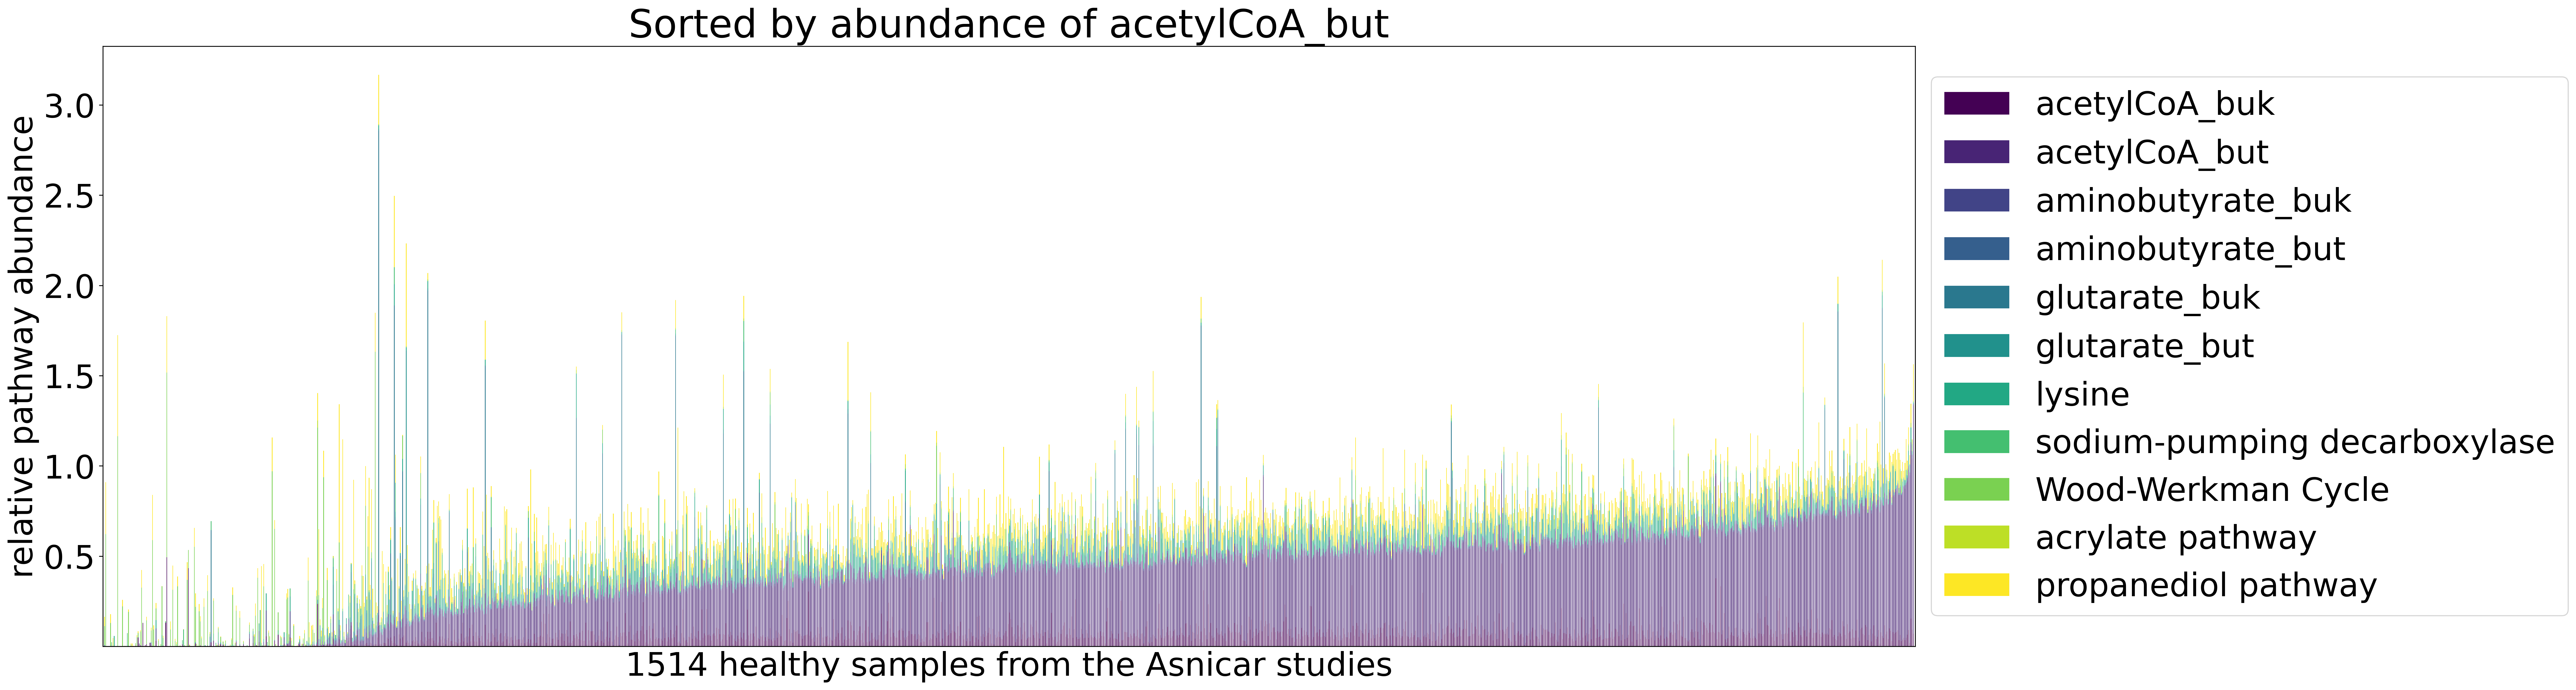

In [123]:
sort_acetylCoA_but = sortedStackedBar(noramlised_unknown_overall_pathway_group, "acetylCoA_but")

<Figure size 1920x1440 with 0 Axes>

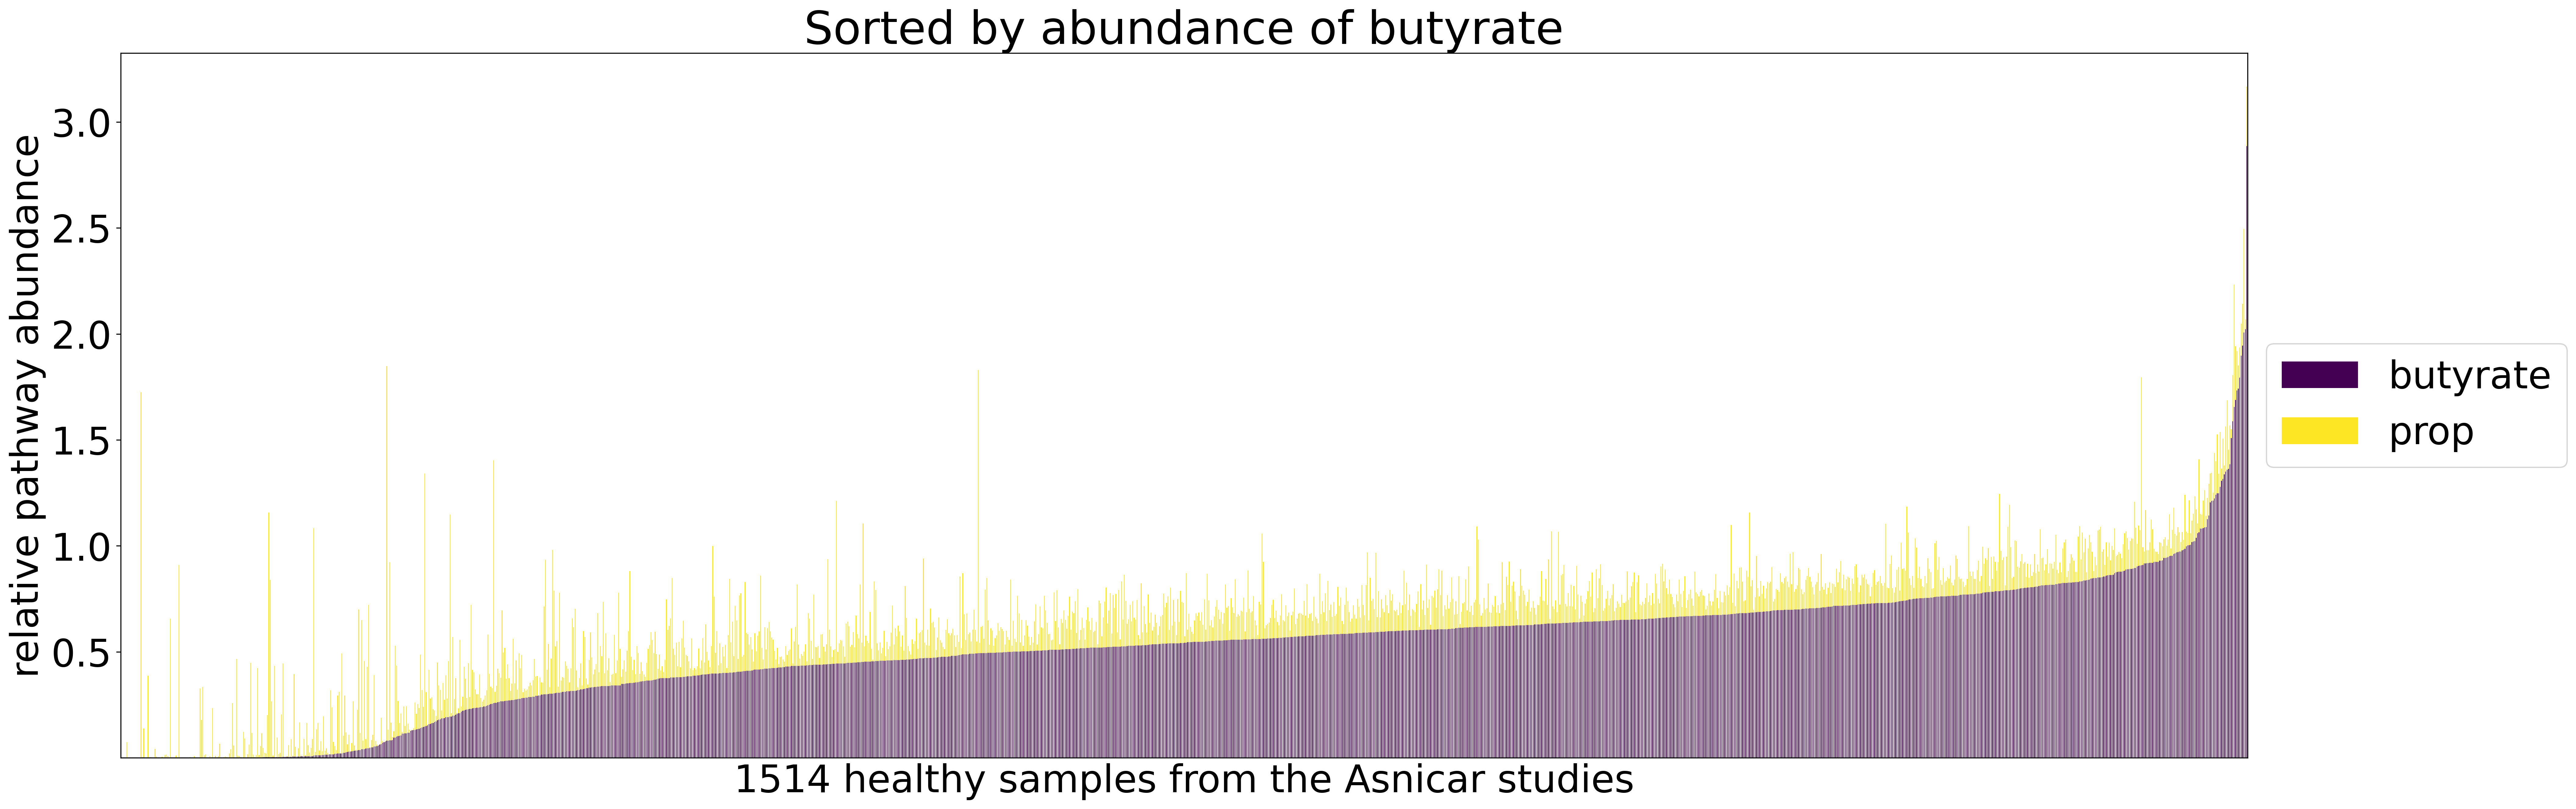

In [122]:
sort_but_graph = sortedStackedBar(prop_but_groupby, "butyrate")

### making normalised percentage bar charts?

In [126]:
def percentageNormalise(df):

    new = df.copy()

    summed = df.sum(axis=0)

    for row in df.index:

        new.loc[row] = df.loc[row].div(summed)

    return new

<Figure size 1920x1440 with 0 Axes>

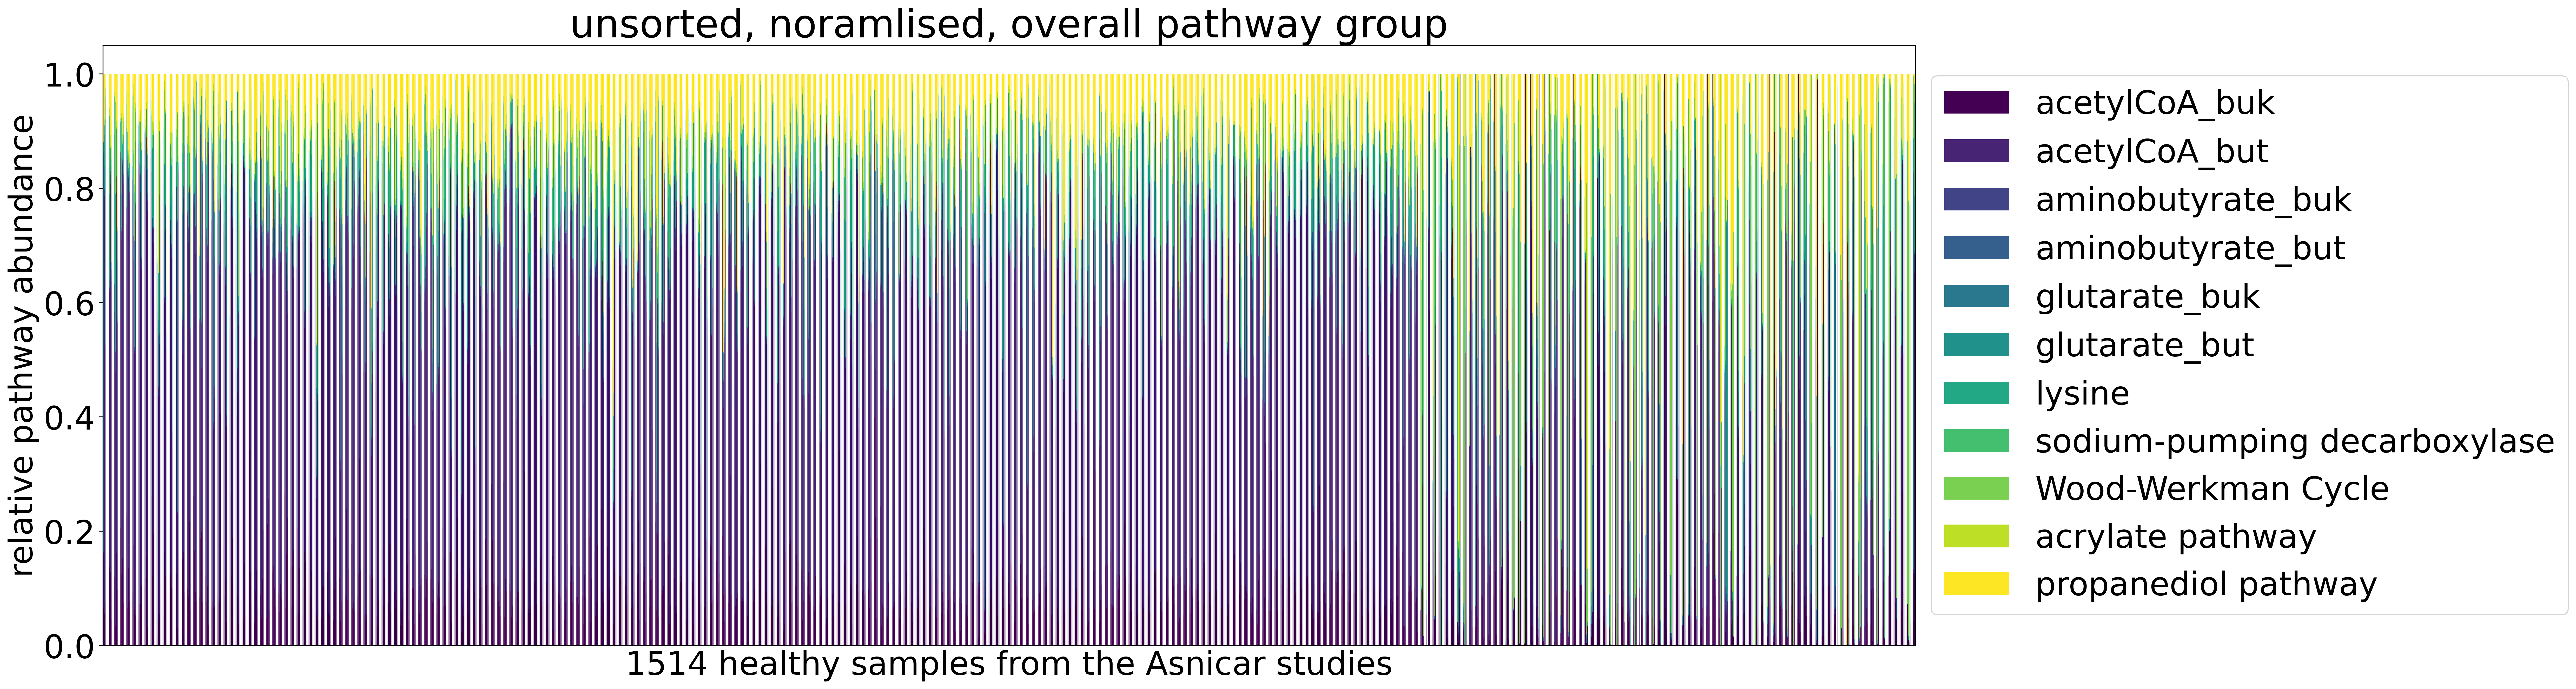

In [127]:
overall_pathway_normalised_group_percent = percentageNormalise(noramlised_unknown_overall_pathway_group)

unsorted_normalised_final_graph_percent = plotStackedBar(stackedBarDF(overall_pathway_normalised_group_percent), "unsorted, noramlised, overall pathway group")

<Figure size 1920x1440 with 0 Axes>

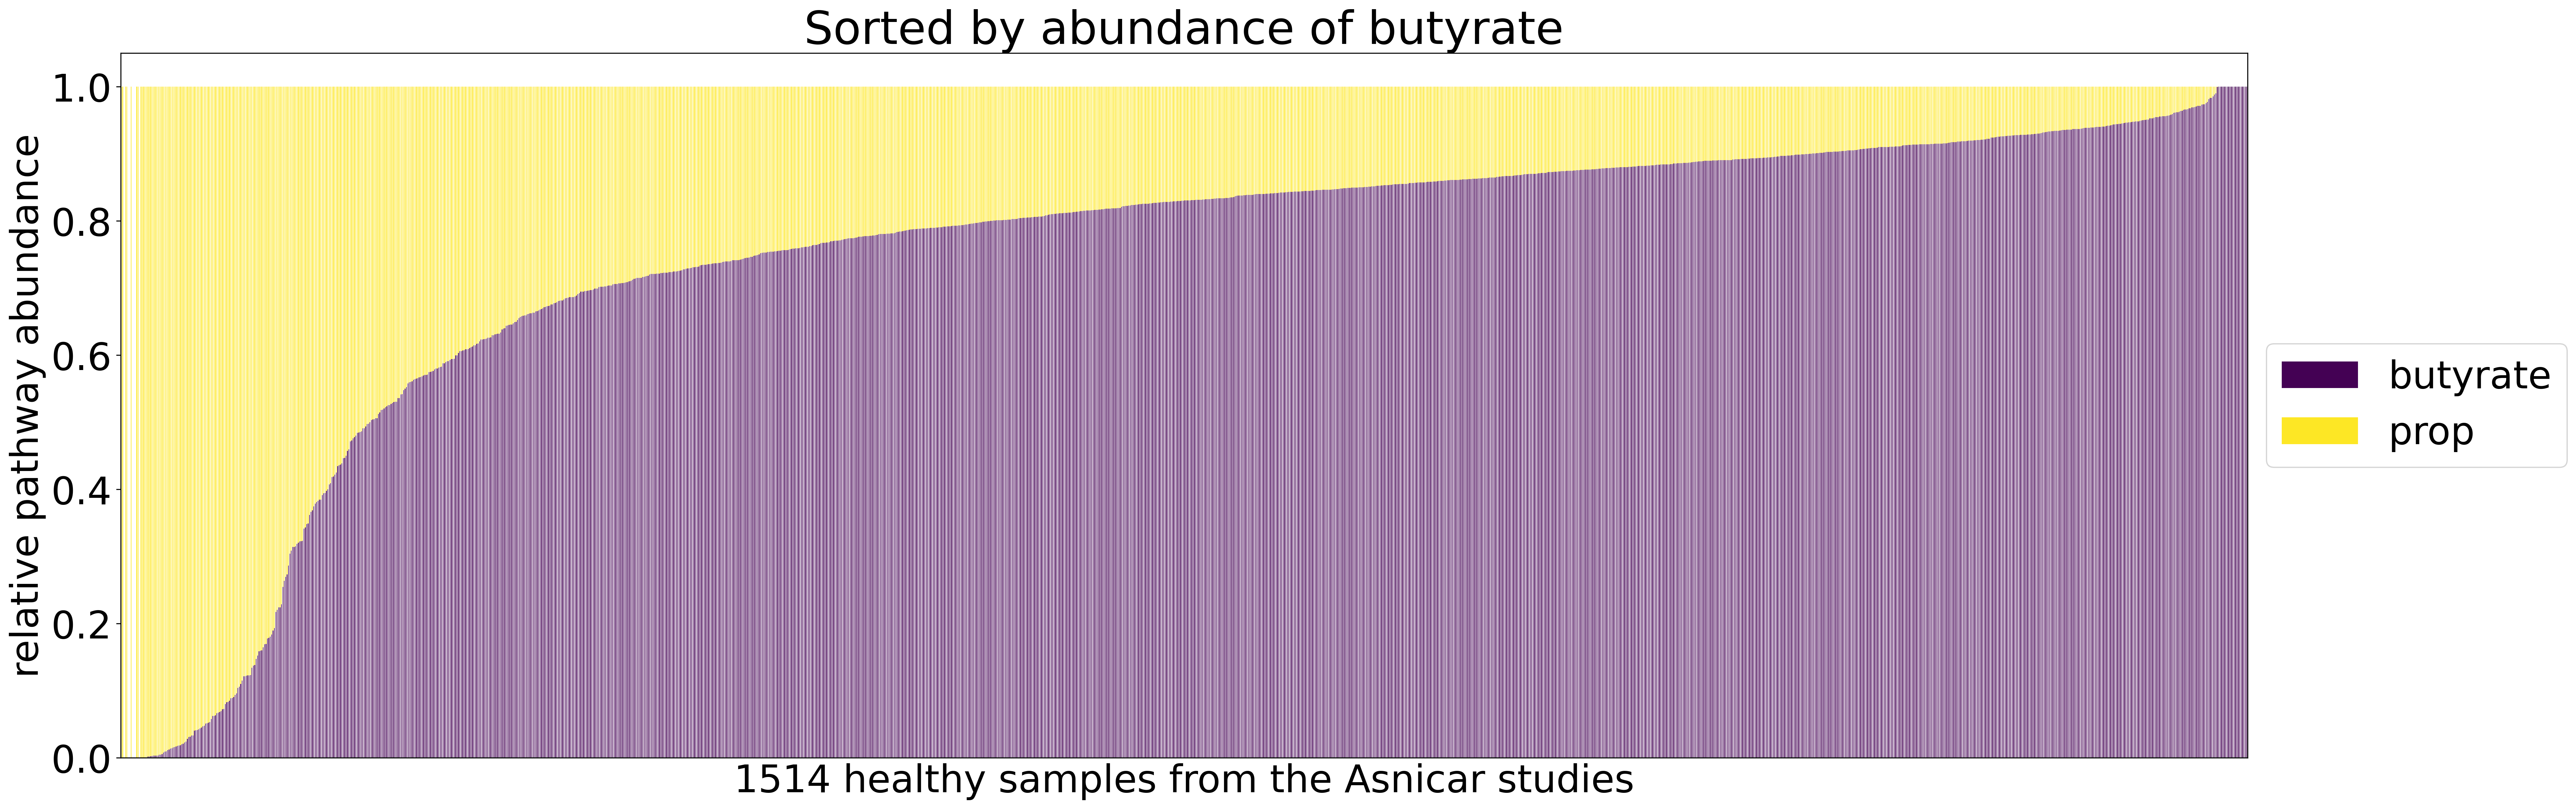

In [130]:
prop_but_percent = percentageNormalise(prop_but_groupby)

sort_but_normalised = sortedStackedBar(prop_but_percent, "butyrate")

<Figure size 1920x1440 with 0 Axes>

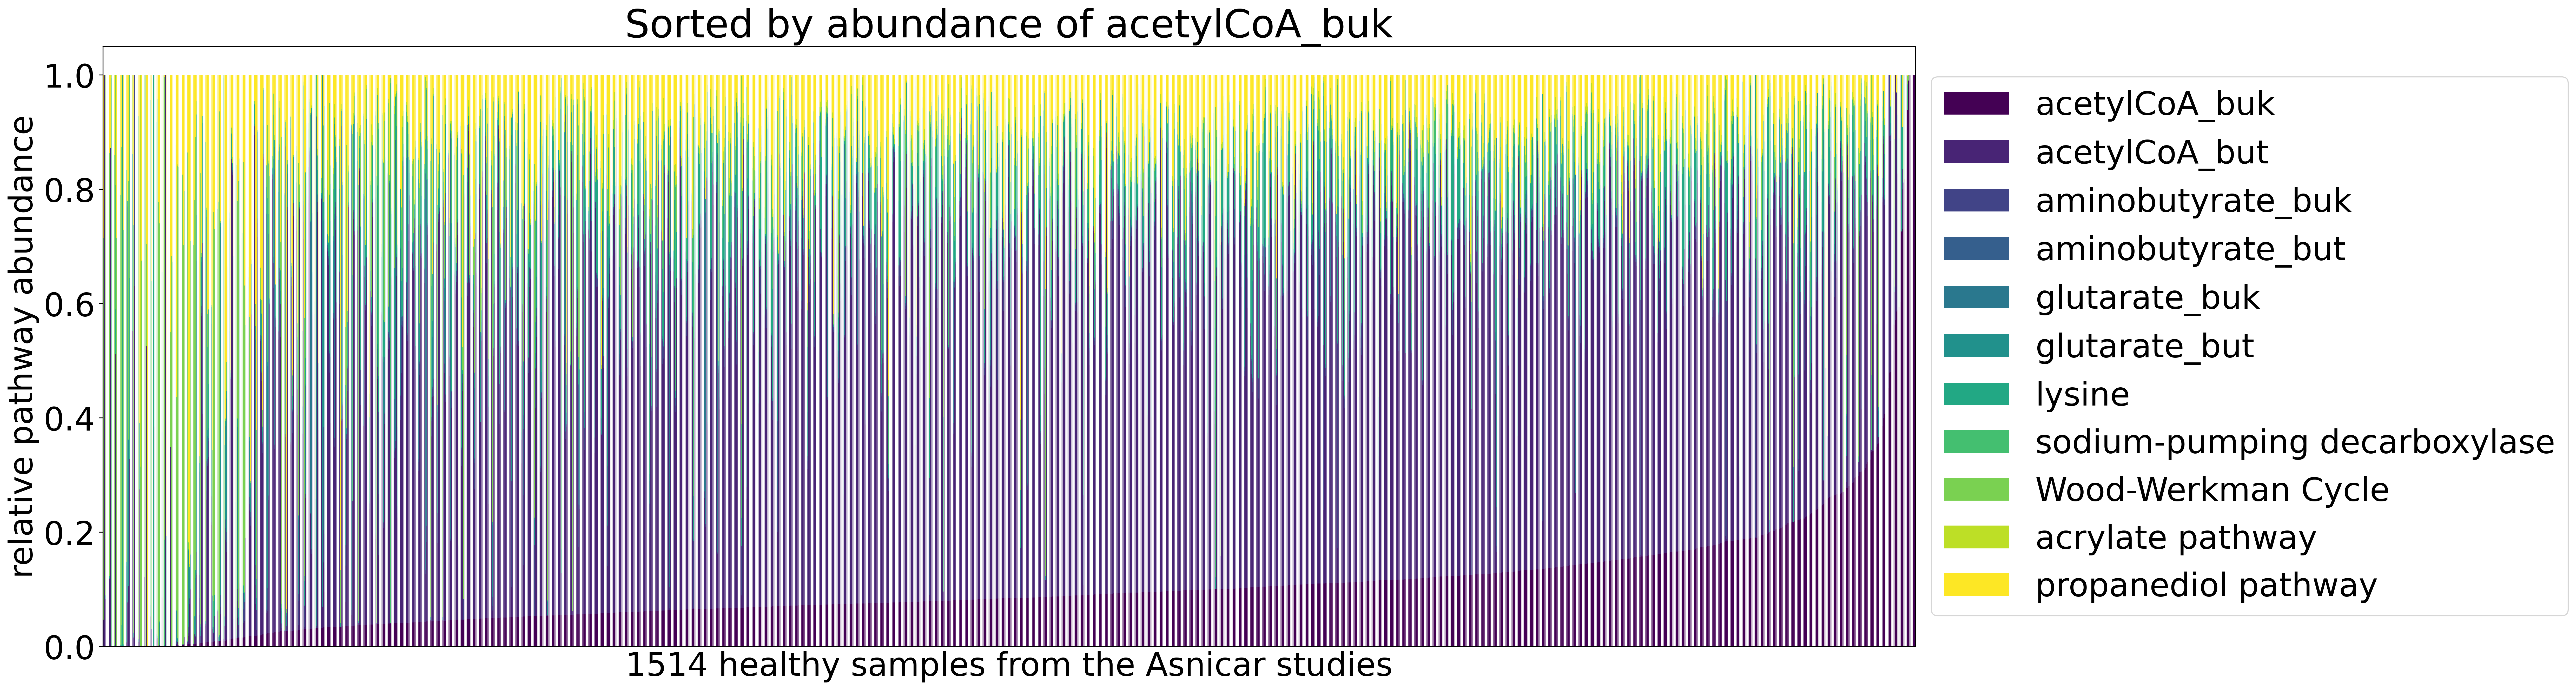

In [128]:
sorted_acetylCoA_buk_normalised_percent = sortedStackedBar(overall_pathway_normalised_group_percent, "acetylCoA_buk")

<Figure size 1920x1440 with 0 Axes>

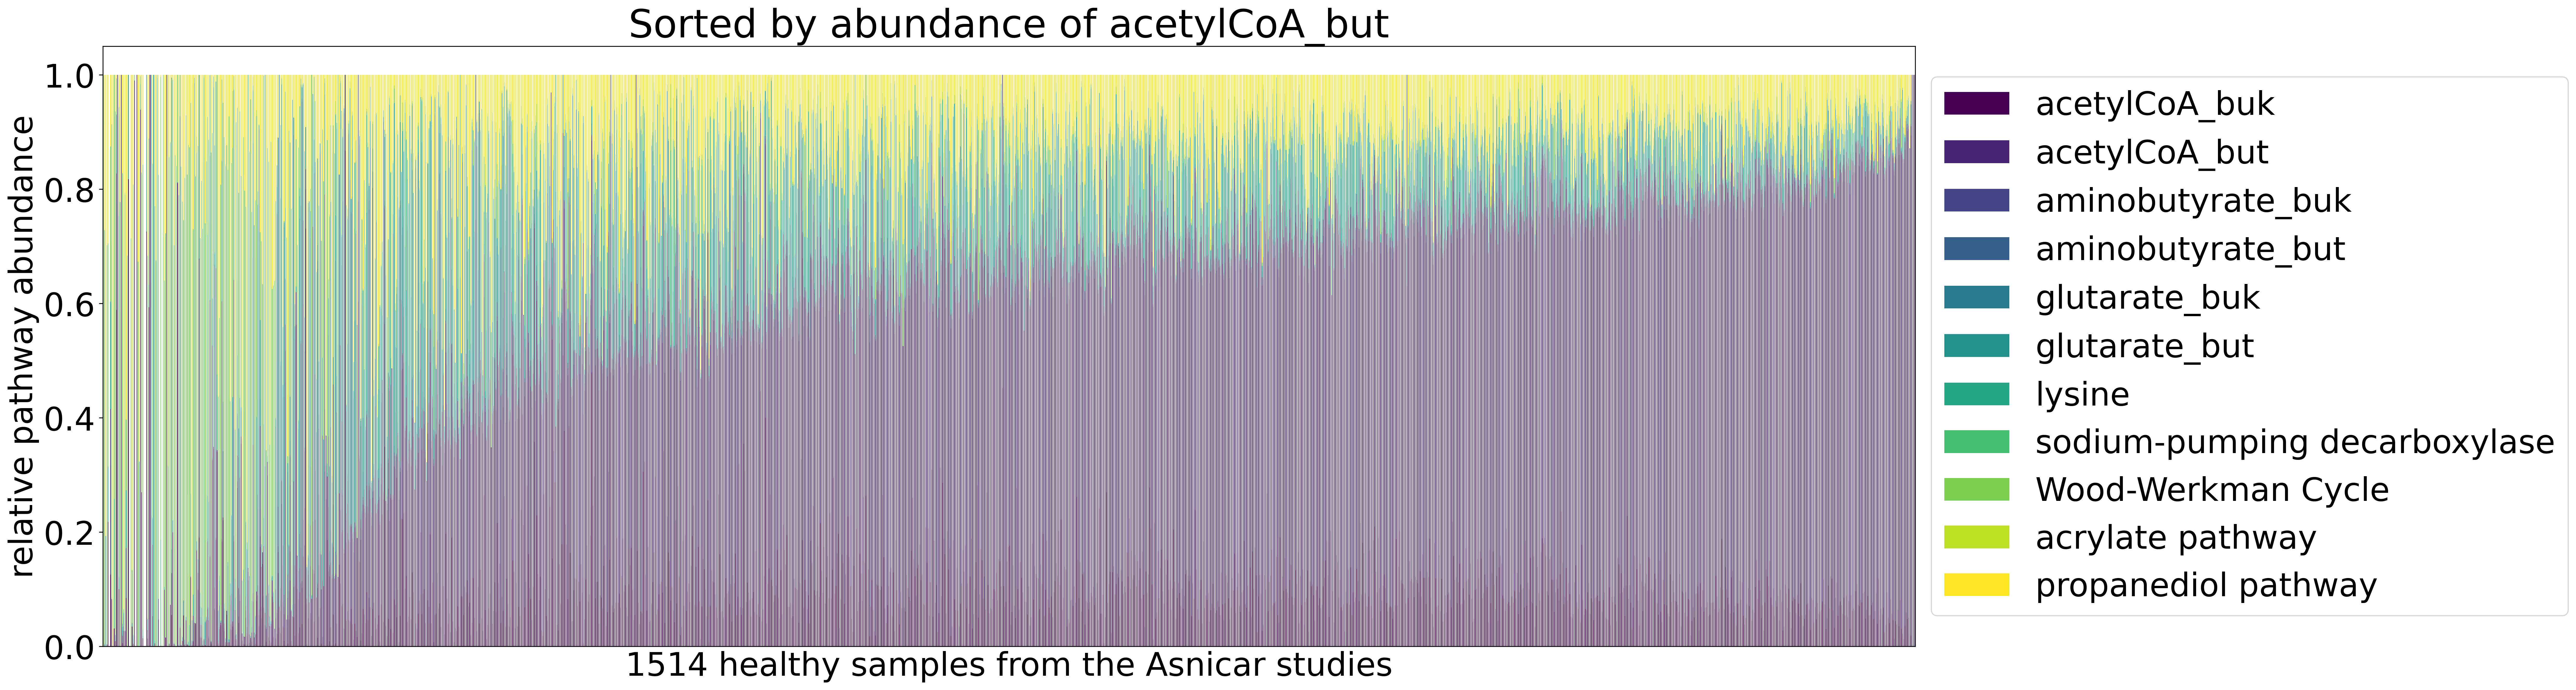

In [129]:
sorted_acetylCoA_but_normalised_percent = sortedStackedBar(overall_pathway_normalised_group_percent, "acetylCoA_but")

<Figure size 1920x1440 with 0 Axes>

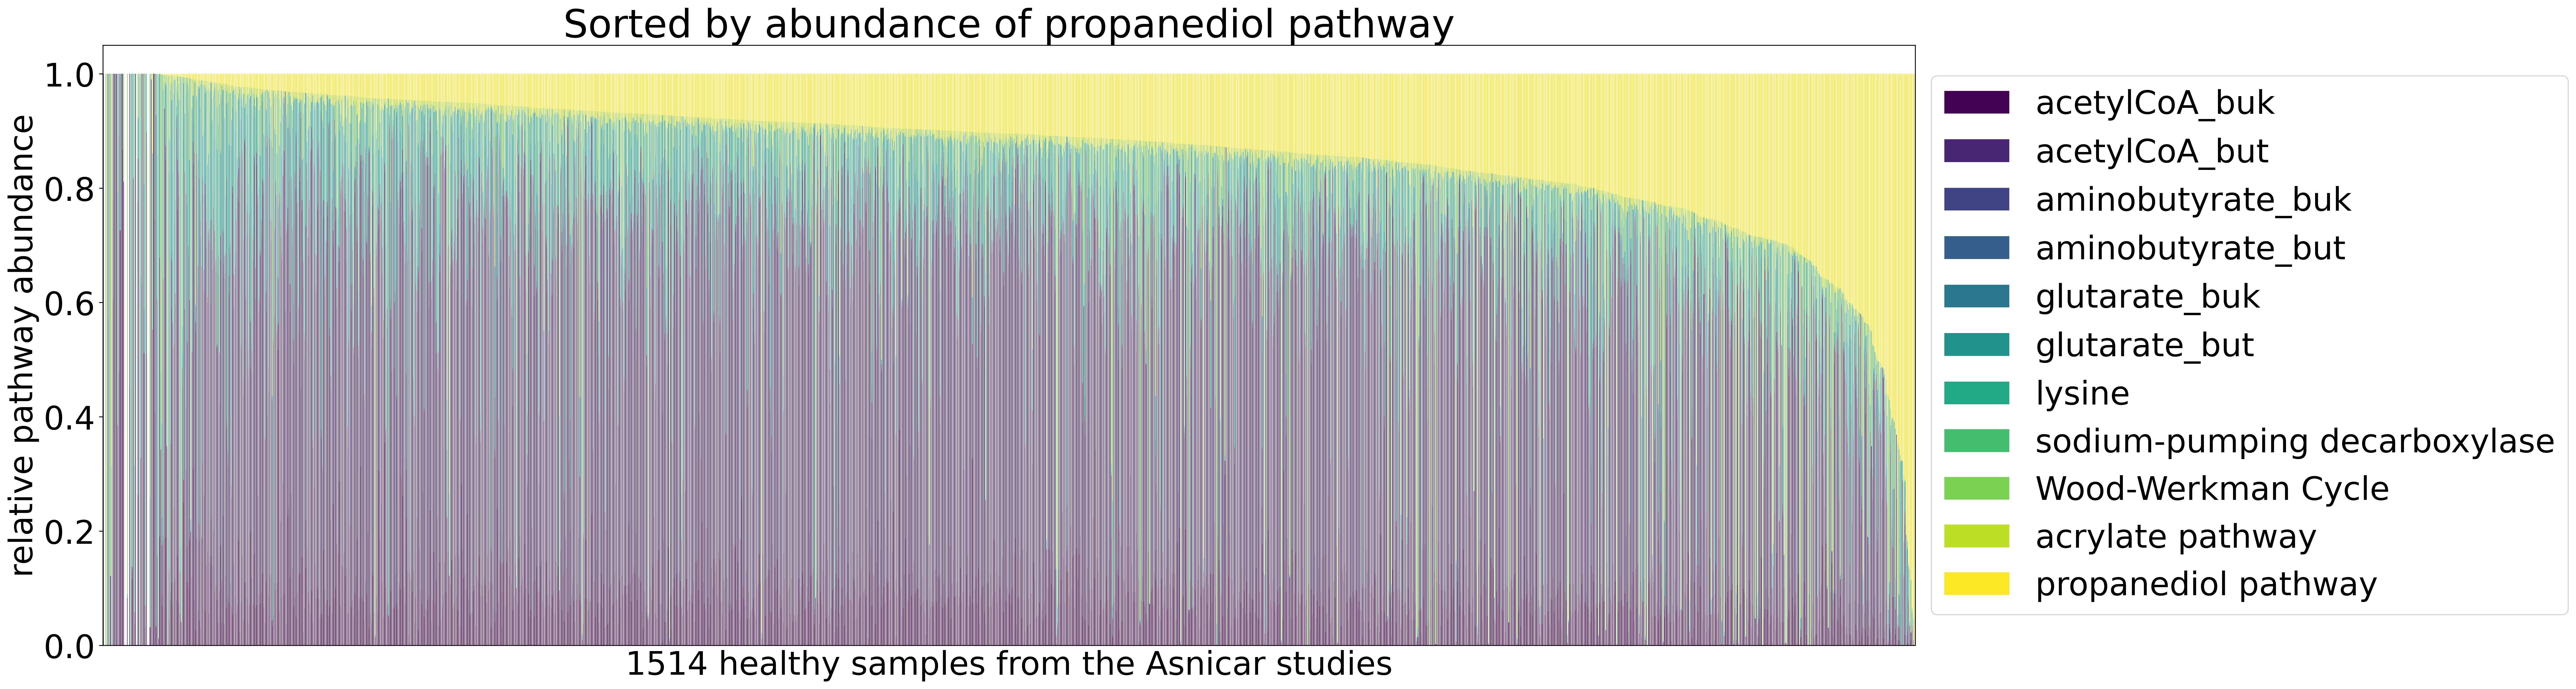

In [131]:
sorted_propanediol_normalised_percent = sortedStackedBar(overall_pathway_normalised_group_percent, "propanediol pathway")

### defining functions for scatter plots

In [160]:
def plotScatter(scatterDF, x_data, y_data, name="Proportions of butyrate versus propionate per sample for the Asnicar studies"):

    plt.rcParams.update({'font.size': 15})
    plt.tight_layout()
    plt.rcParams['figure.dpi']=300
    
    return scatterDF.plot(kind="scatter", color="#58bdd8", x=x_data, y=y_data, figsize=(15,10), xlabel="relative abundance of butyrate", ylabel="relative abundance of propionate", title=name, xlim=(0,3), ylim=(0,1.85))

<Figure size 1920x1440 with 0 Axes>

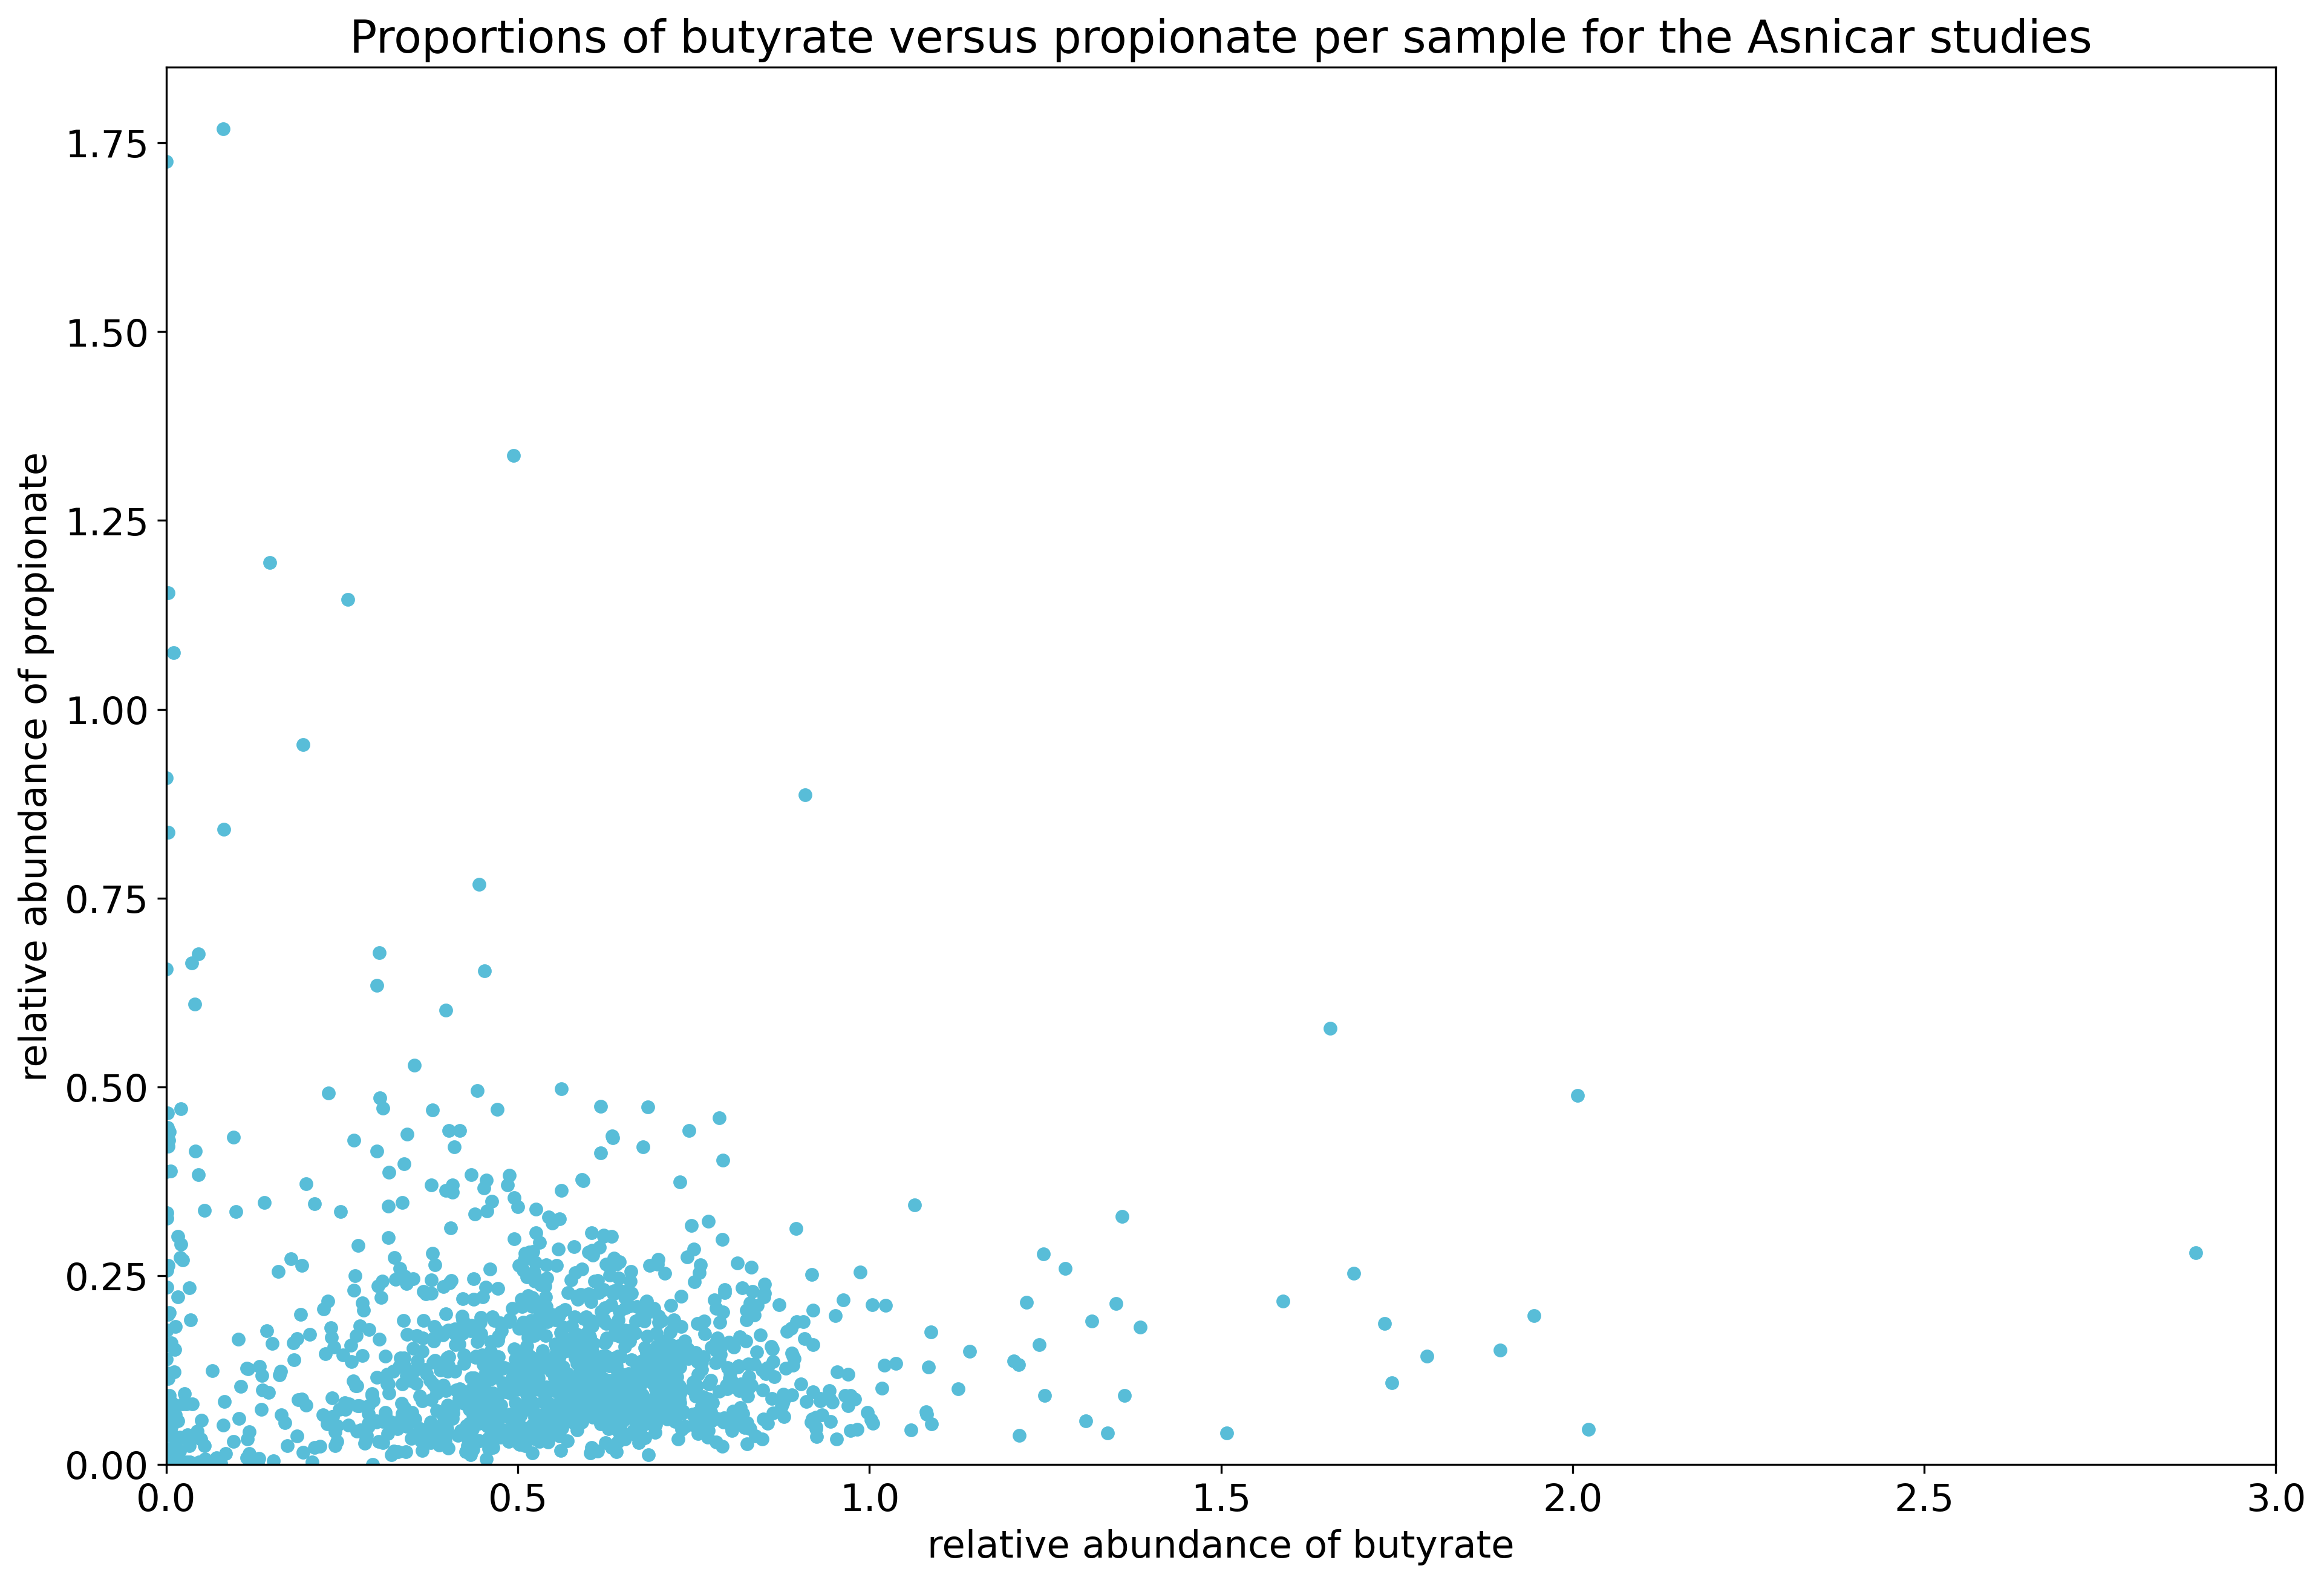

In [161]:
prop_vs_but = prop_but_groupby.transpose()

prop_vs_but_graph = plotScatter(prop_vs_but, x_data="butyrate", y_data="prop")